<h2>Titanic - Data Preprocessing</h2>

<h3>Importing libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<h3>Loading the dataset</h3>

In [2]:
df_titanic = pd.read_csv("./data/titanic-data.csv")

In [3]:
X = df_titanic.iloc[:, df_titanic.columns != "Survived"]
y = df_titanic.iloc[:, df_titanic.columns == "Survived"]

In [4]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


<h3>Entry Feature Selection</h3>

In [6]:
X.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

C:\Users\mike3\AppData\Local\Temp\ipykernel_15652\1059973090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)


In [8]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


<h3>Handle Categorical Features</h3>

In [9]:
CATEGORICAL_COLS = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

<h4>Analysis</h4>

In [10]:
from scipy.stats import chi2_contingency

for col in CATEGORICAL_COLS:
    contingency_table = pd.crosstab(X[col], y["Survived"])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print('\nFeature', col)
    print('Chi-Square Statistic', chi2_stat)
    print('P-Value', p_val)
    print('Degrees of Freedom', dof)


Feature Pclass
Chi-Square Statistic 102.88898875696056
P-Value 4.549251711298793e-23
Degrees of Freedom 2

Feature Sex
Chi-Square Statistic 260.71702016732104
P-Value 1.1973570627755645e-58
Degrees of Freedom 1

Feature SibSp
Chi-Square Statistic 37.2717929152043
P-Value 1.5585810465902147e-06
Degrees of Freedom 6

Feature Parch
Chi-Square Statistic 27.925784060236168
P-Value 9.703526421039996e-05
Degrees of Freedom 6

Feature Embarked
Chi-Square Statistic 26.48914983923762
P-Value 1.769922284120912e-06
Degrees of Freedom 2


<h4>Encode Categorical Features</h4>

In [11]:
for feat in CATEGORICAL_COLS:
    X = pd.get_dummies(X, columns=[feat])

    # Avoid dummy trap
    X.drop(columns=X.columns[-1], inplace=True)

    
bool_cols = X.select_dtypes(include="bool").columns
X[bool_cols] = X[bool_cols].astype(int)

In [12]:
X

,Age,Fare,Pclass_1,Pclass_2,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Embarked_C,Embarked_Q
0,22.0,7.2500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,38.0,71.2833,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,26.0,7.9250,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,35.0,53.1000,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
887,19.0,30.0000,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
888,NaN,23.4500,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
889,26.0,30.0000,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


<h3>Handle Continuous Features</h3>

In [13]:
CONTINUOUS_COLS = ["Age", "Fare"]

<h4>Analysis</h4>

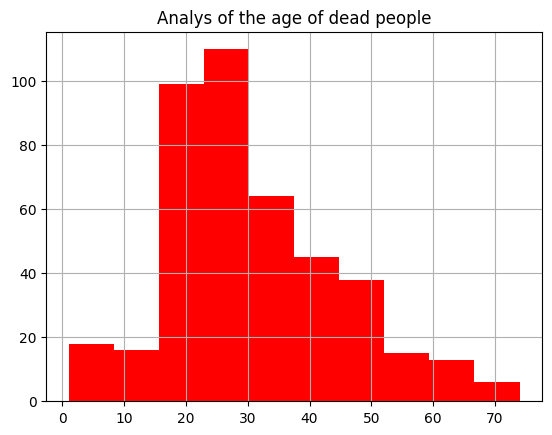

In [14]:
X.loc[y["Survived"] == 0, "Age"].hist(color="red")
plt.title("Analys of the age of dead people")
plt.show()

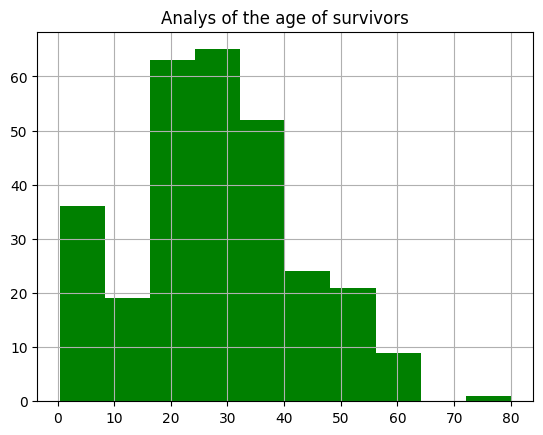

In [15]:
X.loc[y["Survived"] == 1, "Age"].hist(color="green")
plt.title("Analys of the age of survivors")
plt.show()

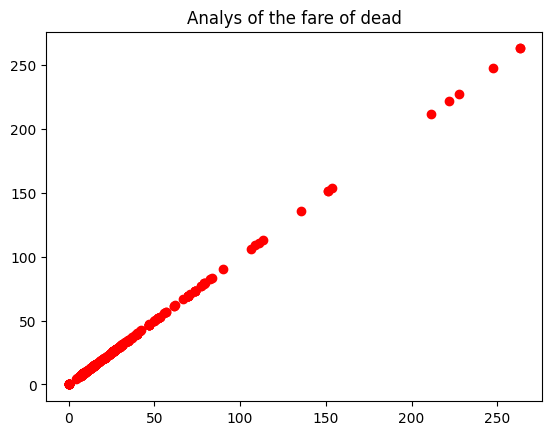

In [16]:
plt.scatter(X.loc[y["Survived"] == 0, "Fare"], X.loc[y["Survived"] == 0, "Fare"], c = "red")
plt.title("Analys of the fare of dead")
plt.show()

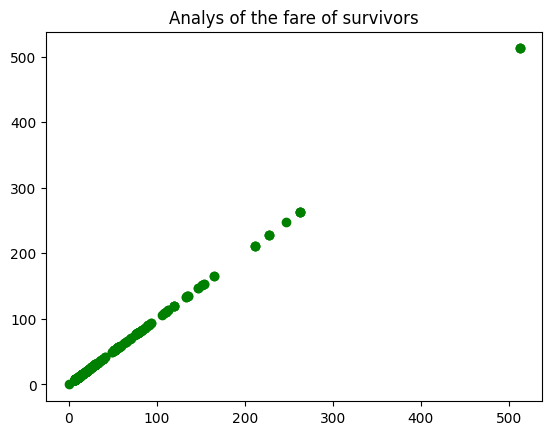

In [17]:
plt.scatter(X.loc[y["Survived"] == 1, "Fare"], X.loc[y["Survived"] == 1, "Fare"], c = "green")
plt.title("Analys of the fare of survivors")
plt.show()

In [18]:
print("The mean fare:", X["Fare"].mean())

The mean fare: 32.204207968574636


<h3>Handling NaNs</h3>

In [19]:
X.isna().sum()

Age           177
Fare            0
Pclass_1        0
Pclass_2        0
Sex_female      0
SibSp_0         0
SibSp_1         0
SibSp_2         0
SibSp_3         0
SibSp_4         0
SibSp_5         0
Parch_0         0
Parch_1         0
Parch_2         0
Parch_3         0
Parch_4         0
Parch_5         0
Embarked_C      0
Embarked_Q      0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="mean")
X[["Age"]] = si.fit_transform(X[["Age"]])

In [21]:
X["Age"].isna().sum()

0

<h3>Splitting data into training & testing sets</h3>

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

<h4>Apply Standardization</h4>

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_train[CONTINUOUS_COLS] = ss.fit_transform(df_train[CONTINUOUS_COLS])
df_test[CONTINUOUS_COLS] = ss.transform(df_test[CONTINUOUS_COLS])


<h4>Saving preprocessed data</h4>

In [24]:
df_train.to_csv("./data/train.csv", index=False)
df_test.to_csv("./data/test.csv", index=False)